## Introduction

In [91]:
# The purpose of this project is to use Machine Learning to determine if a country's average surface temperature can be used
# as a predictor for its position on the World Happiness Index.

In [92]:
# Importing necessary tools:

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Data

In [ ]:
# This data was downloaded from the world happiness index report via Kaggle, and the Lebanese Economy Forum.

In [94]:
# Loading the data:

In [95]:
temp = pd.read_csv(r"C:\Users\Owner\Desktop\Temperatures.csv")
happiness = pd.read_csv(r"C:\Users\Owner\Desktop\world-happiness-report-2021.csv")

## Exploratory Data Analysis and Preparation

In [96]:
# Doing a quick overview of each dataset:

In [97]:
print(temp.head())

        Country  Average yearly temperature (1961–1990, degrees Celsius)
0  Burkina Faso                                              28.29      
1          Mali                                              28.25      
2      Kiribati                                              28.20      
3      Djibouti                                              28.00      
4        Tuvalu                                              28.00      


In [98]:
# Shorten name of second column to "Temp":

In [99]:
temp.columns = ['Country', 'Temp']

In [100]:
print(temp.head())

        Country   Temp
0  Burkina Faso  28.29
1          Mali  28.25
2      Kiribati  28.20
3      Djibouti  28.00
4        Tuvalu  28.00


In [101]:
print(happiness.head())

  Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878  

In [103]:
# Making new dataframe called "happy" that contains only the Country name and Ladder score from the happiness index:

In [104]:
happy = happiness[['Country name', 'Ladder score']]
print(happy.head())

  Country name  Ladder score
0      Finland         7.842
1      Denmark         7.620
2  Switzerland         7.571
3      Iceland         7.554
4  Netherlands         7.464


In [158]:
happy.columns = ['Country', 'Score']

In [105]:
# Check for any missing data:

In [159]:
print(happy.isnull().sum())

Country    0
Score      0
dtype: int64


In [160]:
print(temp.isnull().sum())

Country    0
Temp       0
dtype: int64


## Data Visualization

In [117]:
# Visualize the Happiness Index data on its own (split into parts for legibility):

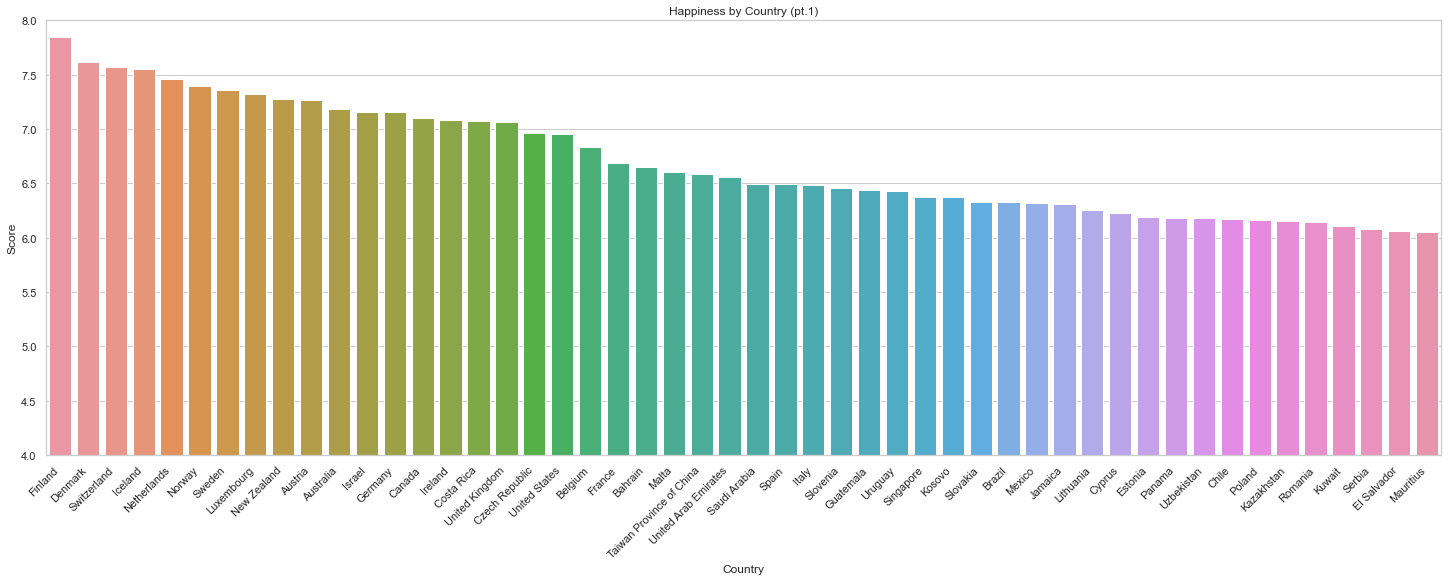

In [161]:
sns.set_theme(style="whitegrid")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country", y="Score", ax=ax, data=happy[:50])
plt.xticks(rotation=45, ha='right')
plt.ylim(4,8)
plt.title('Happiness by Country (pt.1)')
plt.show()

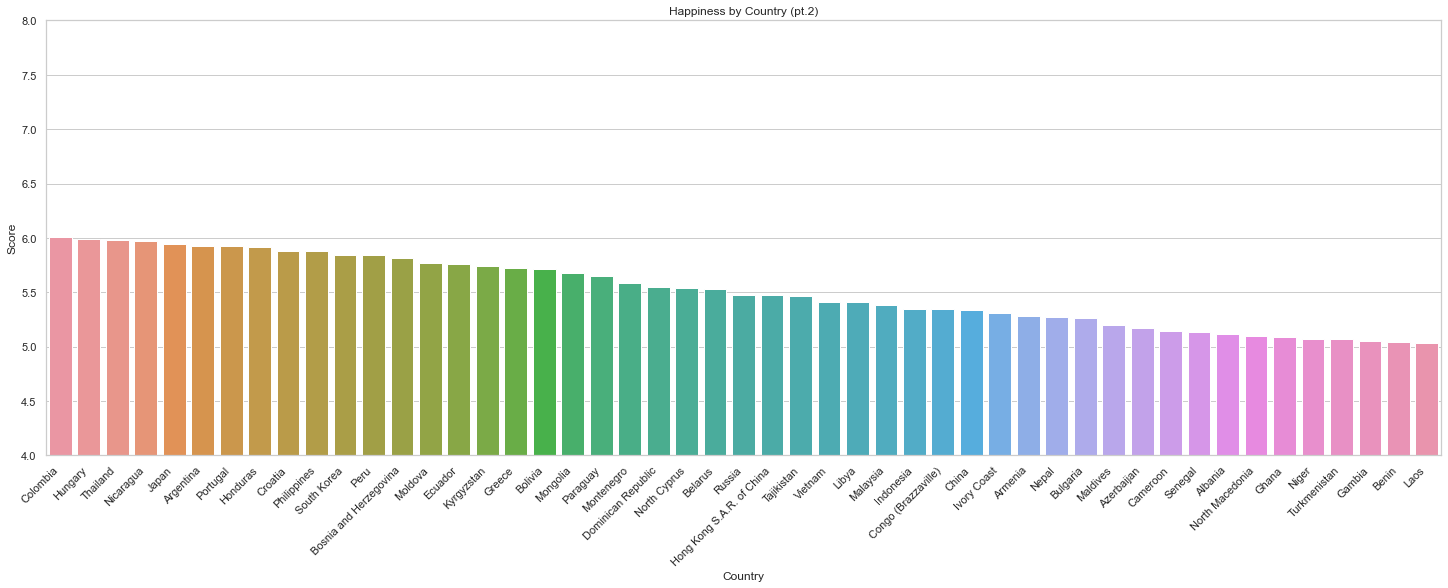

In [162]:
sns.set_theme(style="whitegrid")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country", y="Score", ax=ax, data=happy[51:100])
plt.xticks(rotation=45, ha='right')
plt.ylim(4,8)
plt.title('Happiness by Country (pt.2)')
plt.show()

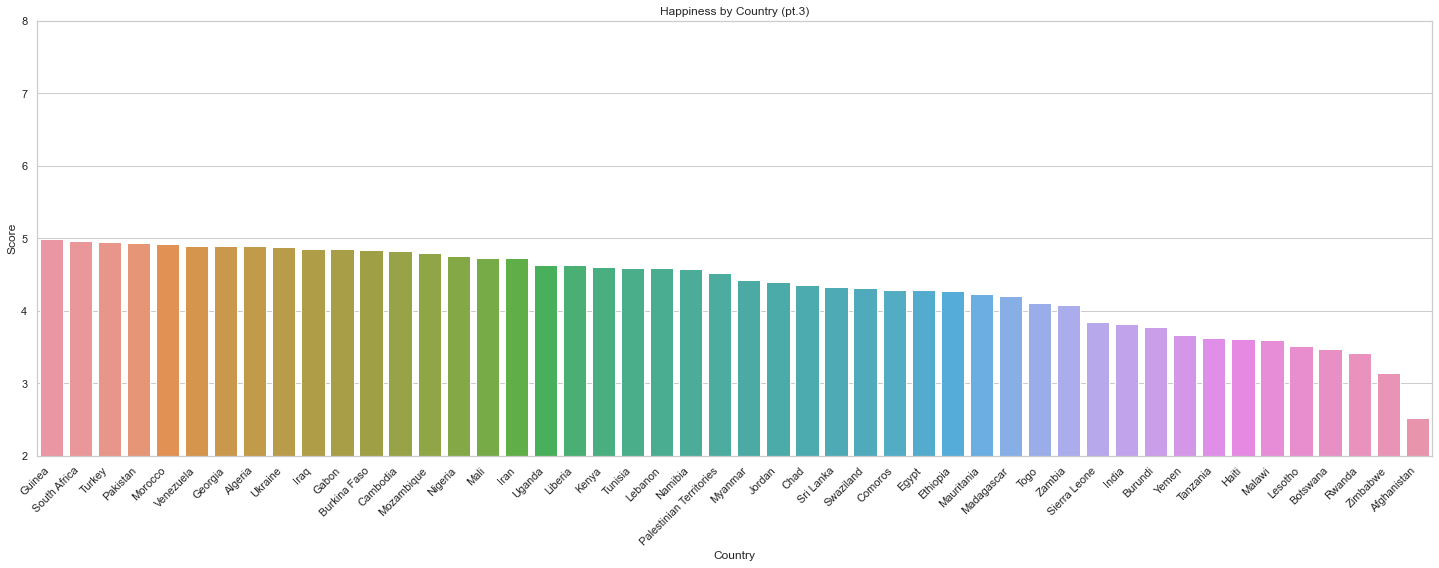

In [163]:
sns.set_theme(style="whitegrid")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country", y="Score", ax=ax, data=happy[101:])
plt.xticks(rotation=45, ha='right')
plt.ylim(2,8)
plt.title('Happiness by Country (pt.3)')
plt.show()

In [112]:
# Visualize the Temperature data on its own:

In [113]:
temp["Temp"] = temp.Temp.astype(float)

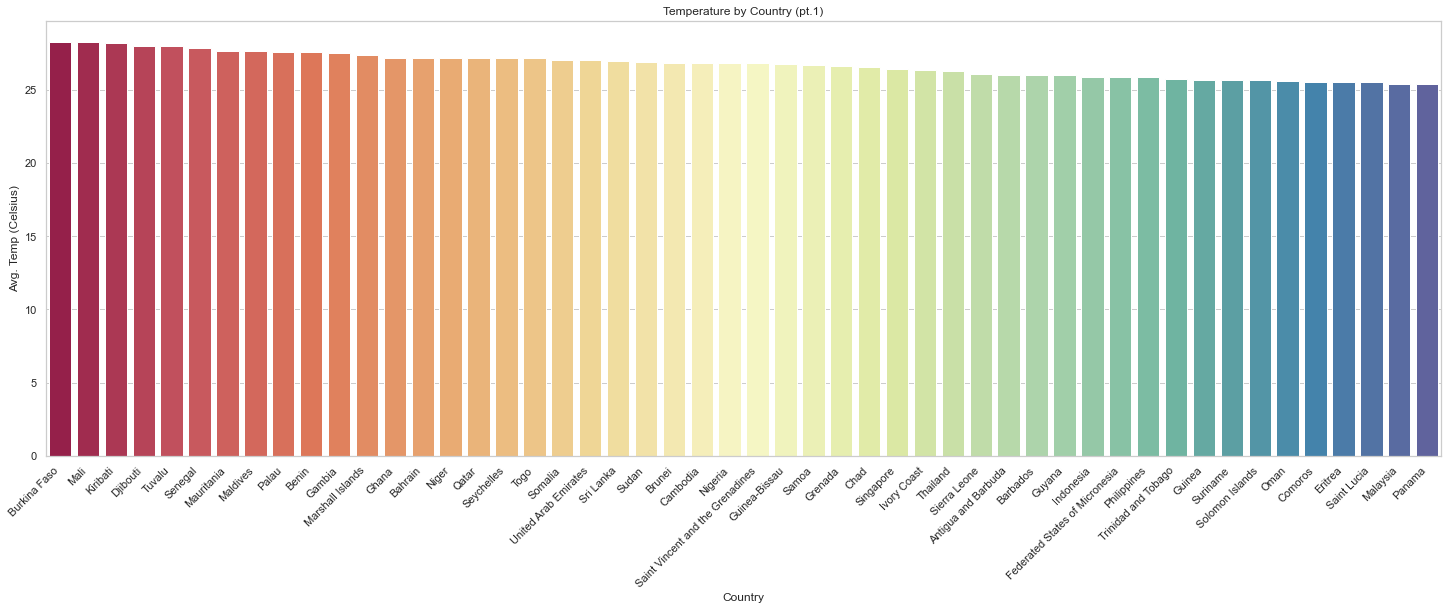

In [143]:
sns.set_theme(style="whitegrid")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country", y="Temp", ax=ax, data=temp[:50], palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Avg. Temp (Celsius)')
plt.title('Temperature by Country (pt.1)')
plt.show()

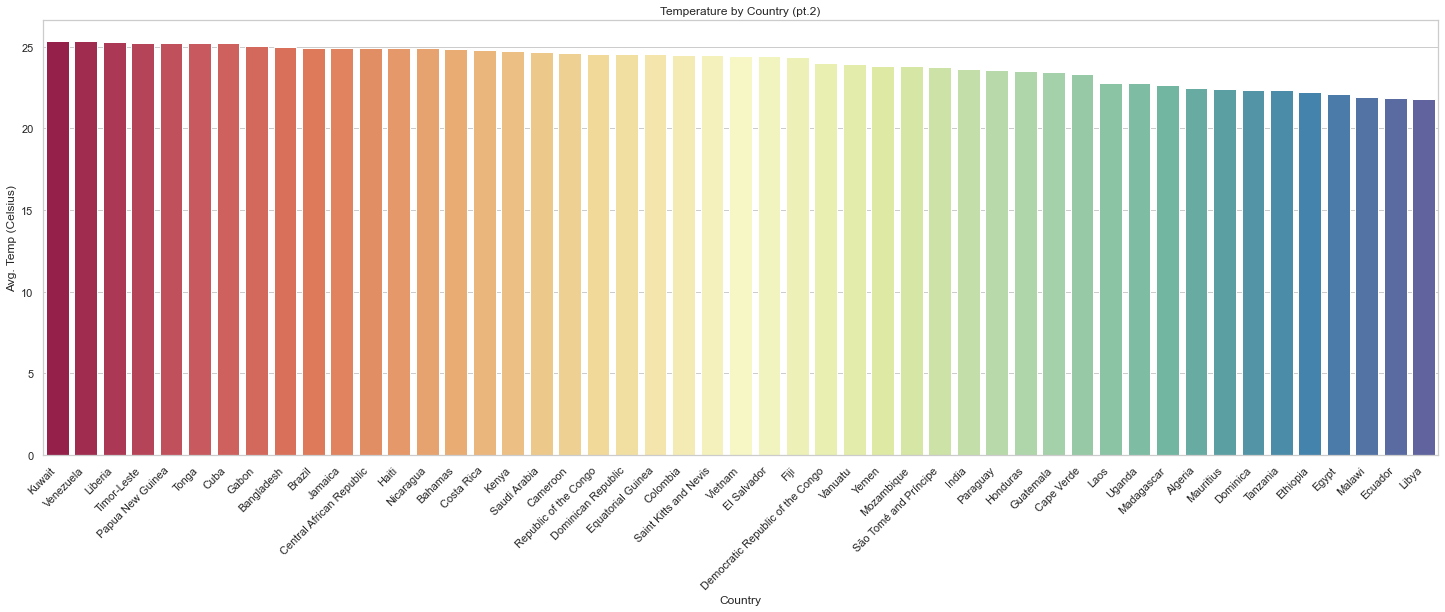

In [144]:
sns.set_theme(style="whitegrid")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country", y="Temp", ax=ax, data=temp[51:100], palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Avg. Temp (Celsius)')
plt.title('Temperature by Country (pt.2)')
plt.show()

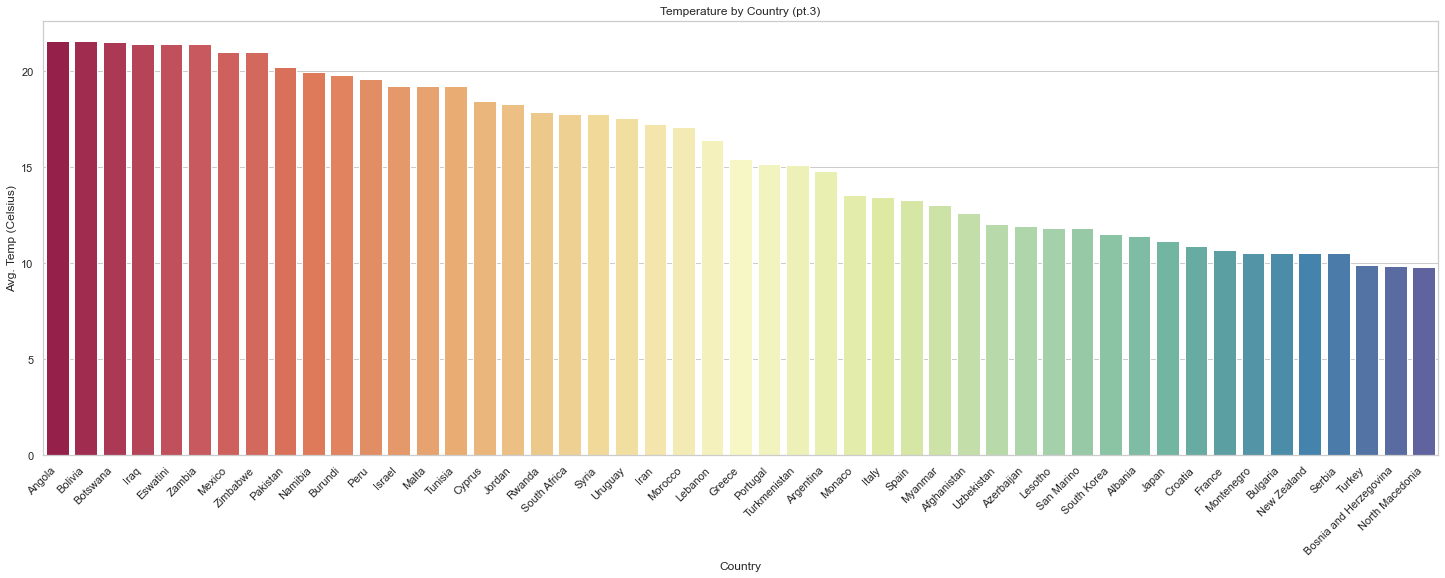

In [145]:
sns.set_theme(style="whitegrid")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country", y="Temp", ax=ax, data=temp[101:150], palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Avg. Temp (Celsius)')
plt.title('Temperature by Country (pt.3)')
plt.show()

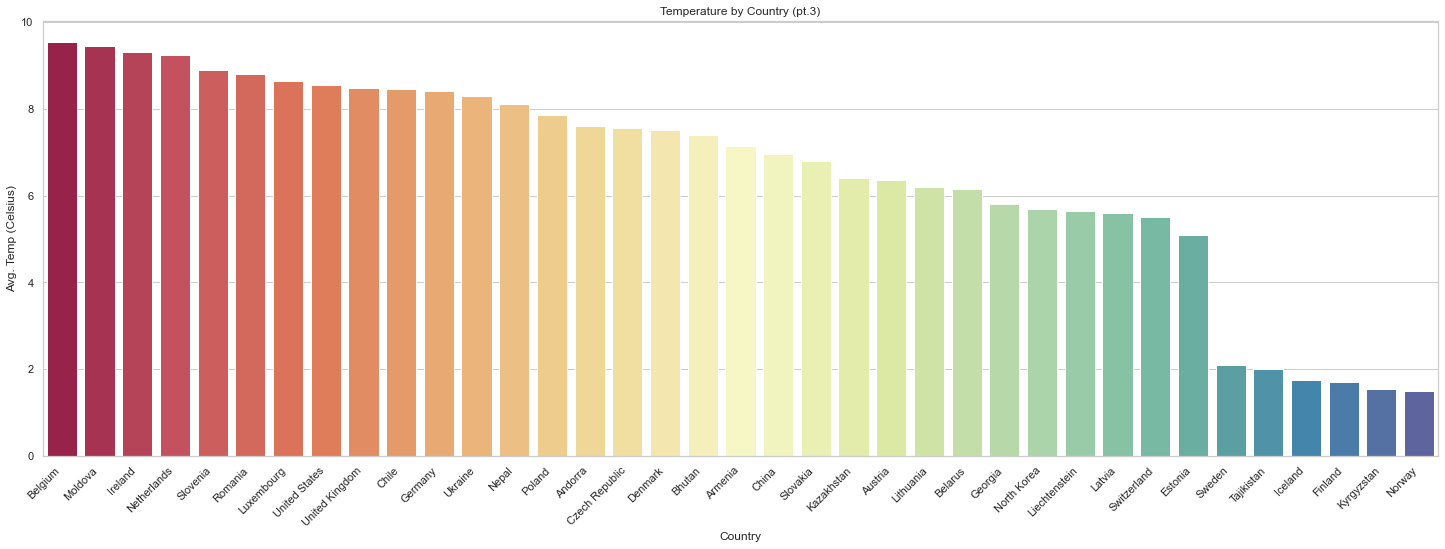

In [146]:
sns.set_theme(style="whitegrid")
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Country", y="Temp", ax=ax, data=temp[151:], palette='Spectral')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Avg. Temp (Celsius)')
plt.title('Temperature by Country (pt.3)')
plt.show()

In [155]:
print(temp.shape), print(happy.shape)

(188, 2)
(149, 2)


(None, None)

In [167]:
# Use pandas to merge the two tables:

In [176]:
df = happy.merge(temp)
print(df.head())

       Country  Score  Temp
0      Finland  7.842  1.70
1      Denmark  7.620  7.50
2  Switzerland  7.571  5.50
3      Iceland  7.554  1.75
4  Netherlands  7.464  9.25


In [ ]:
# Use seaborn to make a line of plot new dataframe:

In [180]:
# Normalize the score and temp columns:

df2 = df[['Score', 'Temp']]

x = df2.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df2 = pd.DataFrame(x_scaled)

print(df2.head())

          0         1
0  1.000000  0.007465
1  0.958263  0.223964
2  0.949051  0.149309
3  0.945854  0.009332
4  0.928934  0.289287


In [ ]:
# Put new score and temp values into df:

In [186]:
df = df.join(df2, lsuffix='S', rsuffix='T')
df = df[['Country', '0_x', '1_x']]
df.columns = ['Country', 'Score', 'Temp']
print(df.head())

       Country     Score      Temp
0      Finland  1.000000  0.007465
1      Denmark  0.958263  0.223964
2  Switzerland  0.949051  0.149309
3      Iceland  0.945854  0.009332
4  Netherlands  0.928934  0.289287


In [ ]:
# Plot the normalized values:

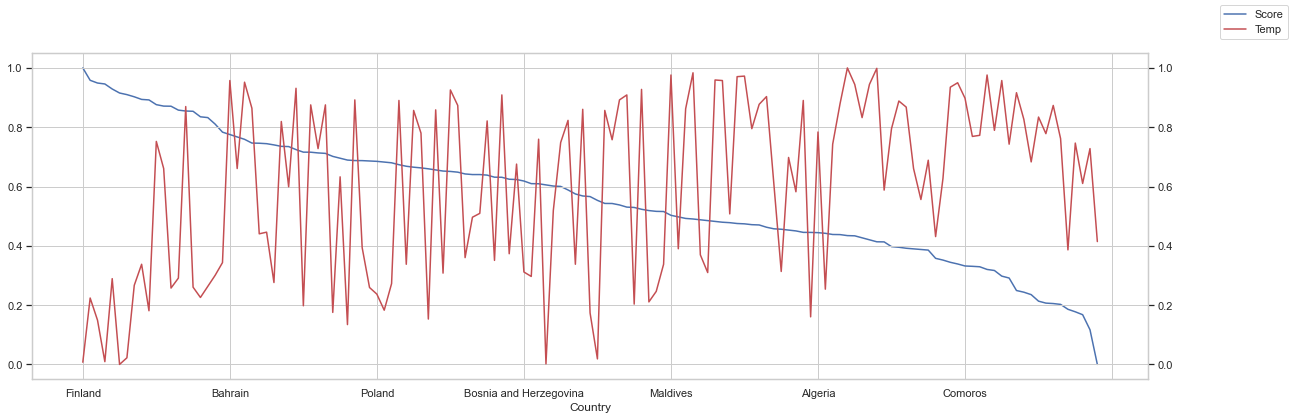

In [190]:
ax = df.plot(x="Country", y="Score", legend=False)
ax2 = ax.twinx()
df.plot(x="Country", y="Temp", ax=ax2, legend=False, color="r", figsize=(20, 6))
ax.figure.legend()
plt.show()

In [ ]:
# At a first glance, we can see that there is not an immediately noticeable correlation between temperature and happiness
# score across all countries, though there may be some negative correlation at the extremes. We'll now perform a 
# train_test_split on the data and use logistic regression to see if there is any overall correlation, or what percentage
# of confidene we can have in guessing a country's reported happiness based on average temperature. After doing a 
# full-scale linear regression, we'll perform the same thing on the countries with the highest 20 scores and the lowest 20
# scores:

## Linear Regression

In [193]:
X = df[['Score']]
Y = df[['Temp']]

from sklearn.linear_model import LinearRegression

x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)
model = LinearRegression()
model.fit(x_train, y_train)

print(model.predict(x_test))

print(model.score(x_test, y_test))

[[0.46305241]
 [0.72726559]
 [0.76896983]
 [0.64230292]
 [0.84162845]
 [0.82271908]
 [0.63051694]
 [0.82828828]
 [0.80186696]
 [0.60927627]
 [0.59580658]
 [0.54011459]
 [0.35516536]
 [0.74099432]
 [0.49711519]
 [0.63582711]
 [0.47833533]
 [0.66509778]
 [0.74280754]
 [0.53493394]
 [0.64567034]
 [0.52301844]
 [0.59567707]
 [0.52042812]
 [0.5298828 ]
 [0.56433413]
 [0.49050986]
 [0.51149149]]
-0.1846090148782591


In [ ]:
# Here, we can tell by the model's score that the model's fit is extremely bad. This aligns with the guess we made by
# looking at the above graph. Let's see if there's a better score when we take just the first 20 highest rated countries:

In [194]:
X2 = X.head(20)
Y2 = Y.head(20)

x2_train, x2_test,y2_train,y2_test = train_test_split(X2,Y2,test_size =0.2)
model2 = LinearRegression()
model2.fit(x2_train, y2_train)

print(model2.predict(x2_test))

print(model2.score(x2_test, y2_test))

[[0.33377255]
 [0.36704687]
 [0.23970863]
 [0.32865343]]
0.1021456178818766


In [ ]:
# The regression score of 0.10, though higher than our negative score, is still a low score and shows the model is not very
# reliable. Let's now also do the same test for the lowest scoring countries:

In [195]:
X3 = X.tail(20)
Y3 = Y.tail(20)

x3_train, x3_test,y3_train,y3_test = train_test_split(X3,Y3,test_size =0.2)
model3 = LinearRegression()
model3.fit(x3_train, y3_train)

print(model3.predict(x3_test))

print(model3.score(x3_test, y3_test))

[[0.63089153]
 [0.9131054 ]
 [0.91459335]
 [0.72190426]]
-0.0011316264103959917


## Conclusions

In [ ]:
# Again, we see that our linear regression model has a low rating for accuracy when making predictions. This leads us to
# conclude that we cannot reliably predict a given country's happiness index rating based on average annual temperature.
# It is much more likely that other factors included in the happiness report (social support, healthy life expectancy,
# freedom to make life choices, generosity, perceptions of corruption, etc.) are better indicators of overall ladder score.